## NOTE: Polynimial Regression are termed as Linear Regression because, we donot the judge the linearity based upon the X, we judge the linearity based upon the coefficient that's "b", so interms of "b", polynimial_regression is LinearRegression and aslo there is a linear combination between the squared feaures and the coefficient

## Equation: y = b + b1.x1 + b2.(x1)^2 + b3.(x1)^3 +....

In [2]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#Import the dataset_Csv_File
dataset=pd.read_csv("Position_Salaries.csv")
X=dataset.iloc[:,1:-1].values #Ledt the positionPart, as it hasbeen already encoded into Levels
Y=dataset.iloc[:,-1].values


### (*) We havnot splitted the data, into Training and testing , because we need all for the model training training for better results, as we have shortage of data
### (*) We donot require for encoding because we donot included the strings, instead included the levelColumn which is the encoding of the positionString_Column

## (*)Training the Simple_LR model

In [4]:
#First implimenting the SimpleLR and training it
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(X,Y)

LinearRegression()

## **Training the Polynomial_LR model**
## Below would be the matrix(inside numpyArray) in which it contains the each dataponits power in each row till "n", where it could be determined as per need {in which could check which giving the best result avoiding underfitting and overfitting} and multiply it with Matrix of coefficint and getting the optimized value of the coefficint while training of the model
###  x^0  x^1  x^2  x^3  ...n
###Datapoint1...
###Datapoint2..  

In [5]:
#For this we should have the matrix in which each row represents the datatpoint and should contain the power from 0 to n in eachCol
#Which would then multiplied by the matrix of Coefficient get their opimizec=d Value while training the LR_model
#Currently we took n=2
from sklearn.preprocessing import PolynomialFeatures #Used for forming the matrix for polynomial imputs
poly_reg= PolynomialFeatures(degree=4) #Will form the will go till powered->5
X_poly=poly_reg.fit_transform(X) #Will transform
print(X_poly)

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


In [6]:
#Now getting the coefficient
regressor_2=LinearRegression()
regressor_2.fit(X_poly,Y)

LinearRegression()

## (*) Visualizing the Smple_LR model results

<function matplotlib.pyplot.show(close=None, block=None)>

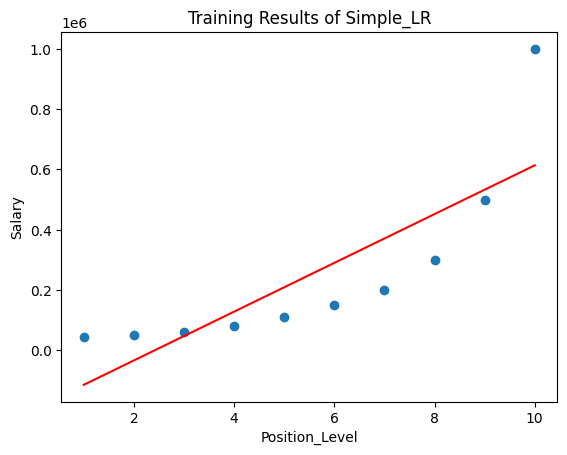

In [7]:
plt.scatter(X,Y)
plt.plot(X,regressor.predict(X),c="r")
plt.title("Training Results of Simple_LR")
plt.xlabel("Position_Level")
plt.ylabel("Salary")
plt.show

In [8]:
# Note: In line, while passing the X as X-axis and as input for Y in axis, should have atleast same firstDimension
# Note: And while prediction(using .predict operation), it should be in 2D form
print(X.shape)
X_poly.shape

(10, 1)


(10, 5)

## (*) Visualizing the Polynomial_LR model results

<function matplotlib.pyplot.show(close=None, block=None)>

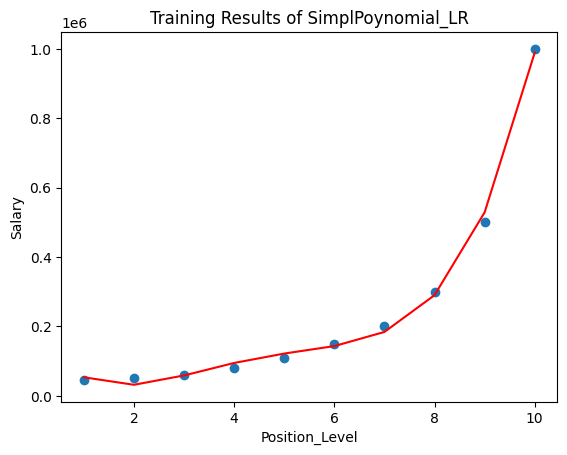

In [19]:
plt.scatter(X,Y)
plt.plot(X,regressor_2.predict(X_poly),c="r")
plt.title("Training Results of SimplPoynomial_LR")
plt.xlabel("Position_Level")
plt.ylabel("Salary")
plt.show

## **Getting the smooth curve in Polynomial_LR model**
### This can be done by getting the input range more minute in decimal point of view from integer point of view, which makes it more smooth

In [15]:
# So converted the X into decimal points from integer points for more inputs and outputs, which leds the line smooth
X_grid=np.arange(min(X),max(X)+0.1,0.1) #Arranging from minimum of X to maximum of X with difference 0.1
X_grid1=X_grid.reshape(len(X_grid),1) #Same meaning, to convert the horizontal array into verticle, means column will become 1 from len(X) basically become transpose
X_grid2=X_grid.reshape(-1,1) #Same meaning as above but from CN procedure
print(X_grid)

[ 1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3
  2.4  2.5  2.6  2.7  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7
  3.8  3.9  4.   4.1  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1
  5.2  5.3  5.4  5.5  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5
  6.6  6.7  6.8  6.9  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9
  8.   8.1  8.2  8.3  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3
  9.4  9.5  9.6  9.7  9.8  9.9 10. ]


In [11]:
# print()
# print(X_grid1) #converted Array from horizontal to vertical
# print()
# print(X_grid2) #same converted array from horzontal to vertical

<function matplotlib.pyplot.show(close=None, block=None)>

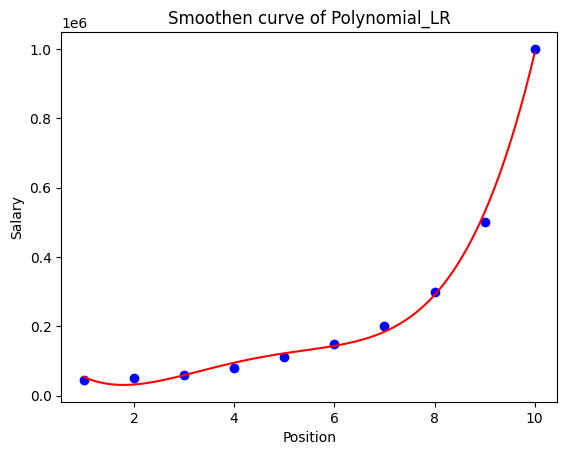

In [16]:
plt.scatter(X,Y,c="b")
plt.plot(X_grid1,regressor_2.predict(poly_reg.fit_transform(X_grid1)),c="r")
plt.title("Smoothen curve of Polynomial_LR")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show

## Now prediction of 6.5 level in Simple_LR model

In [17]:
#Predicting it from Simple_LR
print(regressor.predict([[6.5]])) #First SquareBrackets resposible for 1D(rows) and second is for 2D(column)

#Weird_Answer as bcz the ans is "330k", way more than "160k" salary


[330378.78787879]


## Now prediction of 6.5 level in Polynomial_LR

In [18]:
#Predicting it from Polynomial_LR
#Here we would give input as 6.5,(6.5)^2,(6.5)^3,(6.5)^4 in a single row : As the model formed that way only
# As the above could be done by "poly_reg.fit_transform" method, which would convert the single input into its power in matrix(here in sinlge_rowin 2D matrix as given inthat formate to as accepted by .predict()-method)
print(regressor_2.predict(poly_reg.fit_transform([[6.5]])))

#Perfect_answer as bcz the ans is "158K" as 6.5-level and at 6 level it is "160k"
#PolynomialRegression is more efficient in NonlinearCurves

[158862.45265155]


# **PolynomialRegression is more efficient in NonlinearCurves**